# sklearn.ensemble.HistGradientBoostingRegressor
- Boosting refers to a class of ensemble learning algorithms that add tree models to an ensemble sequentially. Each tree model added to the ensemble attempts to correct the prediction errors made by the tree models already present in the ensemble.

- Gradient boosting is a generalization of boosting algorithms like AdaBoost to a statistical framework that treats the training process as an additive model and allows arbitrary loss functions to be used, greatly improving the capability of the technique. As such, gradient boosting ensembles are the go-to technique for most structured (e.g. tabular data) predictive modeling tasks.

In [1]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
Data=pd.read_csv('140_crash.csv')
Data=Data[0:130]

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Chest_deflection]

# Validation curves

# Learning rate
- float, default=0.1
- The learning rate, also known as shrinkage. This is used as a multiplicative factor for the leaves values. Use 1 for no shrinkage.

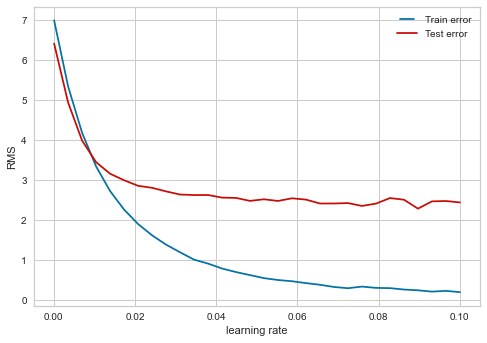

In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
learning_rates = np.linspace(0.0001,0.1,30)
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingRegressor(learning_rate=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('learning rate')
plt.show()


# N estimators
- int, default=100
- The number of boosting stages to perform. Gradient boosting is fairly robust to over-fitting so a large number usually results in better performance.

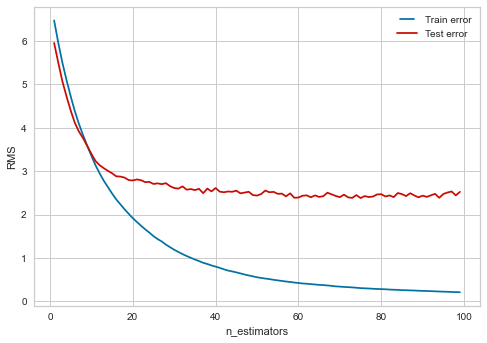

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_estimator = np.arange(1,100,1)
train_results = []
test_results = []
for eta in n_estimator:
    model = GradientBoostingRegressor(n_estimators=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimator, train_results, 'b', label="Train error")
line2, = plt.plot(n_estimator, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('n_estimators')
plt.show()


# Max_depth
- int, default=3
- Maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

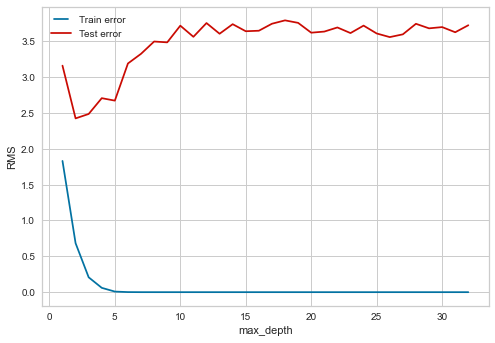

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
n_estimator = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for eta in n_estimator:
    model = GradientBoostingRegressor(max_depth=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimator, train_results, 'b', label="Train error")
line2, = plt.plot(n_estimator, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_depth')
plt.show()

# min_samples_split
- int or float, default=2
- The minimum number of samples required to split an internal node:

- If int, then consider min_samples_split as the minimum number.

- If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

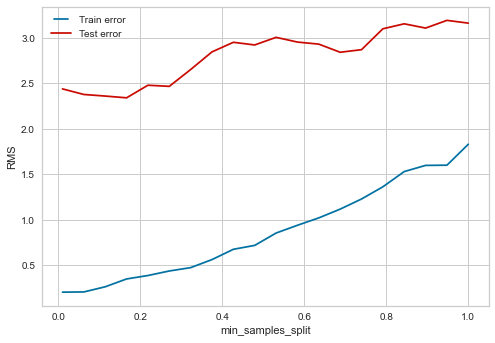

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
learning_rates = np.linspace(0.01,1,20, endpoint=True)
# learning_rates = np.arange(1,10,1)
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingRegressor(min_samples_split=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('min_samples_split')
plt.show()

## min_samples_leaf
- int or float, default=1
- The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.



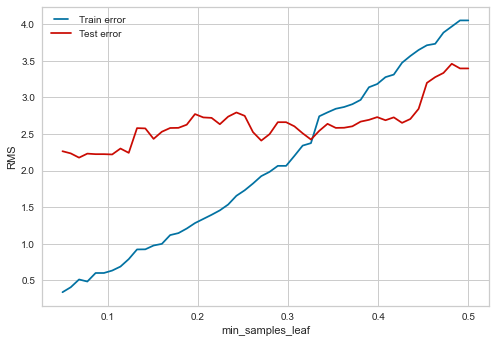

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
learning_rates = np.linspace(0.05, 0.5, 50, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingRegressor(min_samples_leaf=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('min_samples_leaf')
plt.show()

## subsample
- float, default=1.0
- The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads to a reduction of variance and an increase in bias.

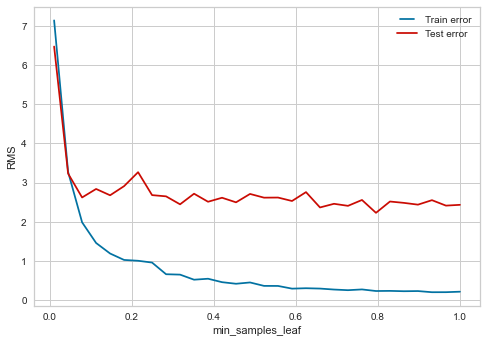

In [19]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
learning_rates = np.linspace(0.01, 1, 30, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = GradientBoostingRegressor(subsample=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('min_samples_leaf')
plt.show()

---
---

# Random Hyperparameter Grid

In [3]:
Data=pd.read_csv('140_crash.csv')
Data=Data[0:130]

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Head_acceleration]

In [229]:
# #chest
# random_grid = {"learning_rate"   : [0.03,0.04,0.05],
#              "subsample"        : [0.4,0.5,0.6],
#              "n_estimators": [65,70,75],
#              'max_depth'        : [3,4,5],
#              "max_features"     : ['auto', 'sqrt'],
#              "min_samples_split": [0.03,0.05,0.1],
#              "min_samples_leaf" : [0.03,0.05,0.1],
#                "criterion":['friedman_mse', 'mse', 'mae'],
#                "loss":['ls', 'lad', 'huber', 'quantile']
#              }
#neck
# random_grid = {"learning_rate"   : [0.045,0.05,0.055],
#              "subsample"        : [0.35,0.4,0.45],
#              "n_estimators": [77,80,85],
#              'max_depth'        : [3,4,5],
#              "max_features"     : ['auto', 'sqrt'],
#              "min_samples_split": [0.03,0.04,0.05],
#              "min_samples_leaf" : [0.03,0.04,0.05],
#                "criterion":['friedman_mse', 'mse', 'mae'],
#                "loss":['ls', 'lad', 'huber', 'quantile']
#              }
#head acc
# random_grid = {"learning_rate"   : [0.045,0.05,0.055],
#              "subsample"        : [0.3,0.35,0.4],
#              "n_estimators": [76,77,79],
#              'max_depth'        : [4,5,6],
#              "max_features"     : ['auto', 'sqrt'],
#              "min_samples_split": [0.03,0.04,0.05],
#              "min_samples_leaf" : [0.03,0.04,0.05],
#                "criterion":['friedman_mse', 'mse', 'mae'],
#                "loss":['ls', 'lad', 'huber', 'quantile']
#              }
#HIC
random_grid = {"learning_rate"   : [0.049,0.05,0.051],
             "subsample"        : [0.3,0.35,0.4],
             "n_estimators": [78,79,80],
             'max_depth'        : [3,4,5],
             "max_features"     : ['auto', 'sqrt'],
             "min_samples_split": [0.01,0.02,0.03],
             "min_samples_leaf" : [0.01,0.02,0.03],
               "criterion":['friedman_mse', 'mse', 'mae'],
               "loss":['ls', 'lad', 'huber', 'quantile']
             }

In [230]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = GradientBoostingRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 400, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 1200 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 1930 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 2820 tasks      | elapsed:   49.8s
[Parallel(n_jobs=-1)]: Done 3874 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 3977 out of 4000 | elapsed:  1.2min remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  1.2min finished


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_iter=400,
                   n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.049, 0.05, 0.051],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 4, 5],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [0.01, 0.02, 0.03],
                                        'min_samples_split': [0.01, 0.02, 0.03],
                                        'n_estimators': [78, 79, 80],
                                        'subsample': [0.3, 0.35, 0.4]},
                   random_state=42, verbose=2)

In [241]:
rf_random.best_params_

{'subsample': 0.35,
 'n_estimators': 79,
 'min_samples_split': 0.03,
 'min_samples_leaf': 0.03,
 'max_features': 'auto',
 'max_depth': 4,
 'loss': 'huber',
 'learning_rate': 0.049,
 'criterion': 'friedman_mse'}

In [242]:
rf_random.best_estimator_

GradientBoostingRegressor(learning_rate=0.049, loss='huber', max_depth=4,
                          max_features='auto', min_samples_leaf=0.03,
                          min_samples_split=0.03, n_estimators=79,
                          subsample=0.35)

In [2]:
Data=pd.read_csv('140_crash.csv')
Data=Data[0:130]

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Chest_deflection]

In [3]:
mod=GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_features='auto',
                          min_samples_leaf=0.03, min_samples_split=0.03,
                          n_estimators=75, subsample=0.4,max_depth=2)

In [53]:
mod=GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_features='auto',
                          min_samples_leaf=0.03, min_samples_split=0.03,
                          n_estimators=75, subsample=0.4,max_depth=2)

In [3]:
# ####CHEST
# mod=GradientBoostingRegressor(criterion='mse', learning_rate=0.025,
#                           max_features='auto', min_samples_leaf=0.1,
#                           min_samples_split=0.1, n_estimators=60,
#                           subsample=0.4)
# mod=GradientBoostingRegressor(criterion='mae', learning_rate=0.03,
#                           max_features='auto', min_samples_leaf=0.05,
#                           min_samples_split=0.05, n_estimators=60,
#                           subsample=0.3)

# mod=GradientBoostingRegressor(learning_rate=0.03, max_depth=4, max_features='auto',
#                           min_samples_leaf=0.05, min_samples_split=0.05,
#                           n_estimators=65, subsample=0.5)
# mod=GradientBoostingRegressor(criterion='mse', learning_rate=0.04, loss='huber',
#                           max_depth=4, max_features='auto',
#                           min_samples_leaf=0.03, min_samples_split=0.1,
#                           n_estimators=70, subsample=0.5)
# mod=GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=5,
#                           max_features='auto', min_samples_leaf=0.05,
#                           min_samples_split=0.05, n_estimators=75,
#                           subsample=0.6)
# ***
# mod=GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_features='auto',min_samples_leaf=0.03, min_samples_split=0.03,n_estimators=75, subsample=0.4,max_depth=2)
# mod=GradientBoostingRegressor(learning_rate=0.035, loss='huber', max_depth=5,
#                           max_features='auto', min_samples_leaf=0.05,
#                           min_samples_split=0.05, n_estimators=75,
#                           subsample=0.6)
# mod=GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_features='auto',
#                           min_samples_leaf=0.03, min_samples_split=0.03,
#                           n_estimators=75, subsample=0.4,max_depth=2)
# # # -------------------------------------------------------------------------------------------------------
####NECK
# mod=GradientBoostingRegressor(criterion='mae', learning_rate=0.05, max_depth=4,
#                           max_features='auto', min_samples_leaf=0.03,
#                           min_samples_split=0.03, n_estimators=75,
#                           subsample=0.4)
# mod= GradientBoostingRegressor(criterion='mse', learning_rate=0.05, loss='huber',
#                           max_depth=5, max_features='auto',
#                           min_samples_leaf=0.03, min_samples_split=0.05,
#                           n_estimators=80, subsample=0.4)
# mod=GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_features='auto',min_samples_leaf=0.04, min_samples_split=0.04,n_estimators=77, subsample=0.45)
# ----------------------------------------------------------------------------------------------------
##Head acc
# mod=GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_features='auto',
#                           min_samples_leaf=0.04, min_samples_split=0.04,
#                           n_estimators=77, subsample=0.45)
# mod=GradientBoostingRegressor(criterion='mae', learning_rate=0.045, loss='huber',
#                           max_depth=5, max_features='auto',
#                           min_samples_leaf=0.03, min_samples_split=0.05,
#                           n_estimators=77, subsample=0.35)
# mod=GradientBoostingRegressor(criterion='mse', learning_rate=0.055, loss='huber',max_depth=4, max_features='auto',min_samples_leaf=0.04, min_samples_split=0.04,n_estimators=76, subsample=0.4)
# # ---------------------------------------------------------------------------------------------------
## HIC
# mod=GradientBoostingRegressor(criterion='mae', learning_rate=0.05, loss='huber',
#                           max_depth=5, max_features='auto',
#                           min_samples_leaf=0.03, min_samples_split=0.03,
#                           n_estimators=79, subsample=0.3)
# mod=GradientBoostingRegressor(criterion='mae', learning_rate=0.05, loss='huber',
#                           max_depth=4, max_features='auto',
#                           min_samples_leaf=0.02, min_samples_split=0.02,
#                           n_estimators=79, subsample=0.35)
# mod=GradientBoostingRegressor(criterion='mae', learning_rate=0.051, loss='lad',
#                           max_depth=5, max_features='auto',
#                           min_samples_leaf=0.01, min_samples_split=0.02,
#                           n_estimators=79, subsample=0.4)
# mod=GradientBoostingRegressor(learning_rate=0.029, loss='huber', max_depth=4,max_features='auto', min_samples_leaf=0.03, min_samples_split=0.03, n_estimators=79,subsample=0.35)

In [4]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [7]:
y_actual = []
predict = []
Data=pd.read_csv('140_crash.csv')
Data=Data[0:130]

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Chest_deflection]
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=19)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error')


<Figure size 576x396 with 0 Axes>

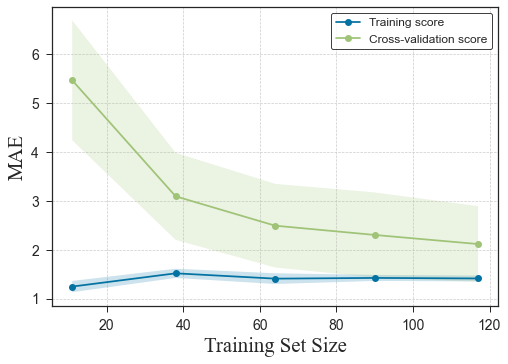

In [9]:

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('CR_LC_chest', bbox_inches="tight")
plt.show()

In [82]:
pd.DataFrame(test_mean)

,0
0,94.987915
1,65.738234
2,57.391314
3,53.103879
4,50.141373


In [7]:
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=19)

In [8]:
X = X.to_numpy()
y = y.to_numpy()


In [9]:
y_Test=y_Test.to_numpy()

In [10]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 0.110234

Root Mean squared error: 0.137234

Root Mean squared error: 0.148132

Root Mean squared error: 0.169990

Root Mean squared error: 0.190390

Root Mean squared error: 0.200036

Root Mean squared error: 0.148320

Root Mean squared error: 0.111619

Root Mean squared error: 0.202868

Root Mean squared error: 0.127127

error COV--->0    1.455421
dtype: float64  error mean --->0    0.088629
Name: mean, dtype: float64  error std --->0    0.128992
Name: std, dtype: float64


# train score

In [11]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.098003
dtype: float64  error mean --->0    0.054744
Name: mean, dtype: float64  error std --->0    0.060109
Name: std, dtype: float64


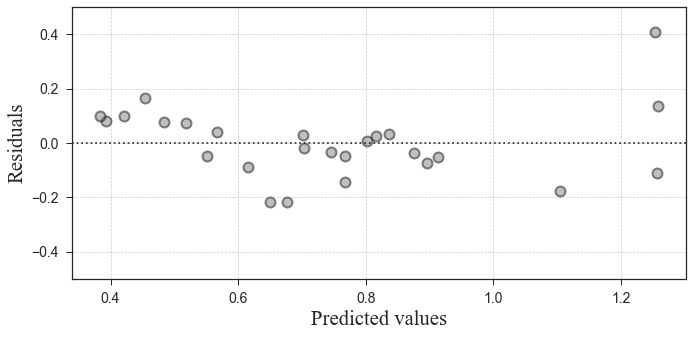

In [14]:
plt.figure(figsize=(11, 5))

plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
# a=sns.residplot(y=abs(y), x=abs(ytr),label='Train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='Test',scatter_kws={"s": 100,"facecolor": 'grey',"linewidth":2,"edgecolors": 'k',"alpha":0.5})
plt.grid( linestyle='--')
# plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='xx-large',**csfont)
plt.ylabel('Residuals', fontsize='xx-large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"

# leg = plt.legend(frameon=True,loc='best',prop={'size': 14})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.xlim([20,50])
plt.ylim([-0.5,0.5])
plt.savefig('nk_CR_res', bbox_inches="tight")
plt.show()

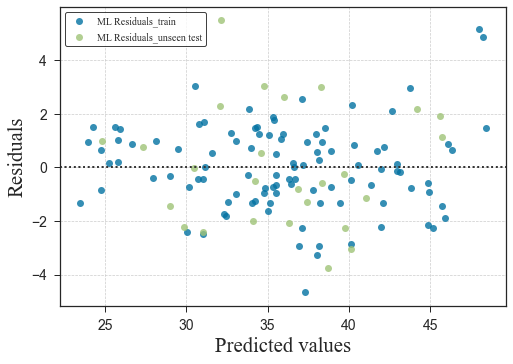

In [34]:
plt.figure()

plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
# plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='xx-large',**csfont)
plt.ylabel('Residuals', fontsize='xx-large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"

leg = plt.legend(frameon=True,loc='best')
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.xlim([20,50])
# plt.ylim([-6,6])
# plt.savefig('repimg/nkfrc_130_res', bbox_inches="tight")
plt.show()

In [315]:
df_tosave=pd.DataFrame(ytestunk,columns = ['Unseen predicted'])
df_tosave['test actual']=pd.DataFrame(y_Test)
df_tosave.to_csv('repimg/Gun.csv')

df_trn=pd.DataFrame(ytr,columns = ['train predicted'])
df_trn['actual']=pd.DataFrame(y)
df_trn.to_csv('repimg/Gtr.csv')

In [42]:
Data=pd.read_csv('res_10param.csv',index_col=None)
nam=Data.describe()
sd=nam.columns[15]
print(sd)

Head Acc


In [43]:
act=abs(nam.loc['mean'][sd])
new=abs(Data[sd].values)

C:\Users\ypyas\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


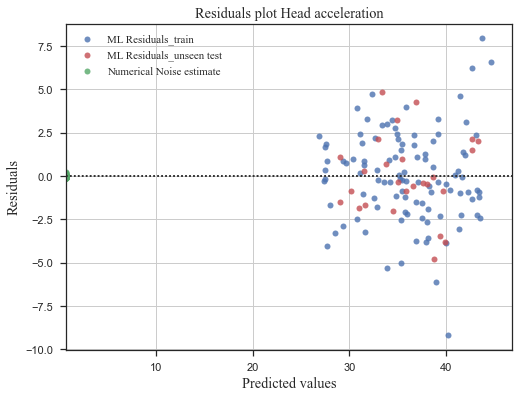

In [44]:
mean=abs(a.loc['mean'])
std=a.loc['std']
csfont = {'fontname':'Times New Roman'}
plt.figure(figsize=(8, 6))

sns.set_theme(style="ticks")
sns.residplot(y=abs(y), x=abs(ytr),color="b",label='ML Residuals_train')
sns.residplot(y=abs(y_Test), x=abs(ytestunk),color="r",label='ML Residuals_unseen test')
# plt.errorbar(mean, 0, yerr=std, fmt='.k');
# sns.residplot(x=np.ones(50)*ass.loc['mean']['HIC 15'], y=df['HIC 15'].to_numpy(), lowess=True, color="g",label='Numerical noise')
sns.residplot(x=np.ones(len(new))*new.mean(), y=new, lowess=True, color="g",label='Numerical Noise estimate')

plt.title('Residuals plot Head acceleration', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()
plt.grid()
plt.savefig('resk1.png')
plt.show()

---
---

# Grid search

In [142]:
##Chest
# random_grid = {"learning_rate"   : [0.03,0.04,0.05],
#              "subsample"        : [0.4,0.5,0.6],
#              "n_estimators": [65,70,75],
#              'max_depth'        : [3,4,5],
#              "max_features"     : ['auto', 'sqrt'],
#              "min_samples_split": [0.03,0.05,0.1],
#              "min_samples_leaf" : [0.03,0.05,0.1],
#                "criterion":['friedman_mse', 'mse', 'mae'],
#                "loss":['ls', 'lad', 'huber', 'quantile']
#              }
###Neck
random_grid = {"learning_rate"   : [0.045,0.05,0.055],
             "subsample"        : [0.35,0.4,0.45],
             "n_estimators": [77,80,85],
             'max_depth'        : [3,4,5],
             "max_features"     : ['auto', 'sqrt'],
             "min_samples_split": [0.03,0.04,0.05],
             "min_samples_leaf" : [0.03,0.04,0.05],
               "criterion":['friedman_mse', 'mse', 'mae'],
               "loss":['ls', 'lad', 'huber', 'quantile']
             }

In [2]:
Data=pd.read_csv('140_crash.csv')
Data=Data[0:130]

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[Chest_deflection]
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [144]:
rf = GradientBoostingRegressor()
reg = GridSearchCV(rf,param_grid = random_grid ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
reg.fit(X,y)
    

Fitting 10 folds for each of 17496 candidates, totalling 174960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 1954 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 2844 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 3898 tasks      | elapsed:   26.8s
[Parallel(n_jobs=-1)]: Done 5112 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 6490 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 8028 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 9730 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 11592 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 13618 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 15804 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 18154 tasks  

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'learning_rate': [0.045, 0.05, 0.055],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [0.03, 0.04, 0.05],
                         'min_samples_split': [0.03, 0.04, 0.05],
                         'n_estimators': [77, 80, 85],
                         'subsample': [0.35, 0.4, 0.45]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [145]:
reg.best_estimator_

GradientBoostingRegressor(learning_rate=0.055, loss='huber', max_depth=5,
                          max_features='auto', min_samples_leaf=0.04,
                          min_samples_split=0.05, n_estimators=85,
                          subsample=0.45)

---
---

In [268]:
# mod=GradientBoostingRegressor(subsample=0.5,n_estimators=110,min_samples_split=3,min_samples_leaf=1,max_features='auto',max_depth=25,learning_rate=0.02)#--0.64
# chest
mod=GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_features='auto',
                          min_samples_leaf=0.03, min_samples_split=0.03,
                          n_estimators=75, subsample=0.4,max_depth=2)
#neck
mod=GradientBoostingRegressor(learning_rate=0.055, loss='huber', max_depth=5,
                          max_features='auto', min_samples_leaf=0.04,
                          min_samples_split=0.05, n_estimators=85,
                          subsample=0.45)


In [269]:
Data=pd.read_csv('140_crash.csv')
Data=Data[0:130]

Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]

X=Data[Data.columns[0:13]]
y=Data[neck_force]

In [270]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [271]:
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=19)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error')
kf=cv

In [64]:
# Data=pd.read_csv('140_crash.csv')
# Data=Data[0:130]

# Head = Data.columns[14]
# Chest_deflection =  Data.columns[13]
# Head_acceleration = Data.columns[15]
# neck_force = Data.columns[16]

# X=Data[Data.columns[0:13]]
# y=Data[Chest_deflection]
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=19)
# plt.figure()
# ind = np.arange(len(y)) 
# plt.scatter(ind,y, color="b",label="Training")
# ind = np.arange(len(y_Test))
# plt.scatter(ind,y_Test, color="r",label="Test")
# plt.title("Unseen")
# plt.xlabel("Actual")
# plt.ylabel("pred")
# plt.legend(loc="best")
# plt.show()

<Figure size 576x396 with 0 Axes>

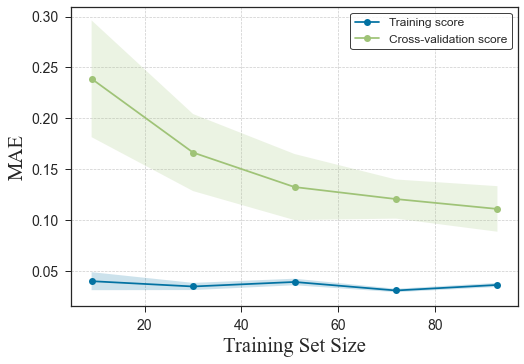

In [272]:

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.savefig('repimg/nkfrc_130_L', bbox_inches="tight")
plt.show()

## Learning Curve

In [66]:
# train_mean=-np.mean(train_score,axis=1)
# train_std=-np.std(train_score,axis=1)
# test_mean=-np.mean(test_score,axis=1)
# test_std=-np.std(test_score,axis=1)
    
# plt.figure()
# plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
# plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
# plt.xlabel("Training Set Size")
# plt.ylabel("RMS Error")
# plt.legend(loc="best")
# plt.show()

## Unknown data test

In [273]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

# mean_absolute_error(y_Test, ytestunk)

Root Mean squared error: 0.130346

Root Mean squared error: 0.128661

Root Mean squared error: 0.126512

Root Mean squared error: 0.135705

Root Mean squared error: 0.186070

Root Mean squared error: 0.196826

Root Mean squared error: 0.108199

Root Mean squared error: 0.089548

Root Mean squared error: 0.186386

Root Mean squared error: 0.116414

error COV--->0    1.235956
dtype: float64  error mean --->0    0.095662
Name: mean, dtype: float64  error std --->0    0.118234
Name: std, dtype: float64


# train score

In [43]:
# ytestunk=HBM_Train.predict(X)
# err=np.zeros(len(ytestunk))
# for u in range (0,len(ytestunk)):
#     err[u]=np.sqrt((y[u]-ytestunk[u])**2)
# a=pd.DataFrame(err).describe()
# cov_r=a.loc['std']/abs(a.loc['mean'])
# print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

In [274]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.405363
dtype: float64  error mean --->0    0.040786
Name: mean, dtype: float64  error std --->0    0.057319
Name: std, dtype: float64


In [54]:
Data=pd.read_csv('res_10param.csv',index_col=None)
nam=Data.describe()
sd=nam.columns[13]
print(sd)

Chest Deflection [mm]


In [55]:
act=abs(nam.loc['mean'][sd])
new=abs(Data[sd].values)

C:\Users\ypyas\anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:214: RuntimeWarning: invalid value encountered in true_divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


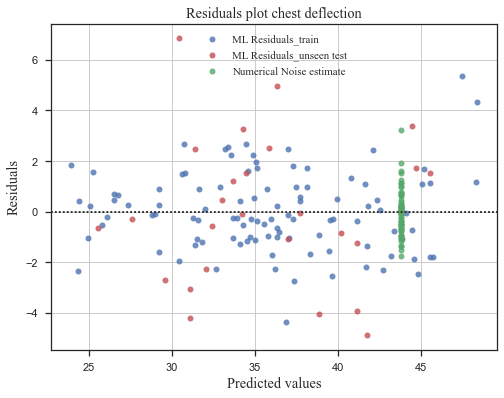

In [69]:
mean=abs(a.loc['mean'])
std=a.loc['std']
csfont = {'fontname':'Times New Roman'}
plt.figure(figsize=(8, 6))

sns.set_theme(style="ticks")
sns.residplot(y=abs(y), x=abs(ytr),color="b",label='ML Residuals_train')
sns.residplot(y=abs(y_Test), x=abs(ytestunk),color="r",label='ML Residuals_unseen test')
# plt.errorbar(mean, 0, yerr=std, fmt='.k');
# sns.residplot(x=np.ones(50)*ass.loc['mean']['HIC 15'], y=df['HIC 15'].to_numpy(), lowess=True, color="g",label='Numerical noise')
sns.residplot(x=np.ones(len(new))*new.mean(), y=new, lowess=True, color="g",label='Numerical Noise estimate')

plt.title('Residuals plot chest deflection', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()
plt.grid()
plt.savefig('resk1.png')
plt.show()